# Build a classification model that can accurately predict a user’s adoption level (High, Medium, Low).Provide insights for the product team to identify users at risk of low adoption and take proactive measures to increase engagement.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Gating basic information about the data

In [3]:
data = pd.read_csv("DATASET/user_adoption_messy_2000_rows.csv")

In [4]:
data.head()

,UserID,Login_Freq,SessionDuration_Min,Feature_Usage_Count,TasksCompleted,Subscription_Type,DaysSinceSignup,SupportTickets,Training_Attended,Adoption_Level
0,U00001,7.0,30.0,225.0,11.0,Premium,546,9,No,Low
1,U00002,20.0,12.0,127.0,53.0,Basic,589,7,No,Medium
2,U00003,15.0,46.0,238.0,10.0,Free,266,11,Yes,Medium
3,U00004,11.0,48.0,225.0,85.0,Premium,93,7,No,Medium
4,U00005,8.0,18.0,7.0,84.0,Free,212,9,No,Low


In [5]:
data.shape

(2000, 10)

## Quick reviwe of all information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UserID               2000 non-null   object 
 1   Login_Freq           1960 non-null   float64
 2   SessionDuration_Min  1960 non-null   float64
 3   Feature_Usage_Count  1960 non-null   float64
 4   TasksCompleted       1960 non-null   float64
 5   Subscription_Type    2000 non-null   object 
 6   DaysSinceSignup      2000 non-null   int64  
 7   SupportTickets       2000 non-null   int64  
 8   Training_Attended    2000 non-null   object 
 9   Adoption_Level       2000 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 156.4+ KB


## Checking the outliers in the data

In [7]:
data.isna().sum()

UserID                  0
Login_Freq             40
SessionDuration_Min    40
Feature_Usage_Count    40
TasksCompleted         40
Subscription_Type       0
DaysSinceSignup         0
SupportTickets          0
Training_Attended       0
Adoption_Level          0
dtype: int64

## correcting thye column names

In [8]:
data.columns = data.columns.str.strip()

data.rename(columns={
    "Login_Freq": "login_frequency",
    "SessionDuration_Min": "session_duration_min",
    "TasksCompleted": "tasks_completed",
    "DaysSinceSignup": "days_since_Signup",
    "SupportTickets": "support_tickets",
    "Training_Attended": "training_attended",
    "Adoption_Level": "adoption_level",
    "Feature_Usage_Count": "feature_usage_count"
    
}, inplace=True)

data.head(10)

,UserID,login_frequency,session_duration_min,feature_usage_count,tasks_completed,Subscription_Type,days_since_Signup,support_tickets,training_attended,adoption_level
0,U00001,7.0,30.0,225.0,11.0,Premium,546,9,No,Low
1,U00002,20.0,12.0,127.0,53.0,Basic,589,7,No,Medium
2,U00003,15.0,46.0,238.0,10.0,Free,266,11,Yes,Medium
3,U00004,11.0,48.0,225.0,85.0,Premium,93,7,No,Medium
4,U00005,8.0,18.0,7.0,84.0,Free,212,9,No,Low
5,U00006,21.0,6.0,186.0,8.0,Basic,217,11,No,Medium
6,U00007,7.0,41.0,210.0,36.0,Free,270,10,No,Low
7,U00008,19.0,42.0,44.0,93.0,Premium,297,2,Yes,Low
8,U00009,23.0,45.0,63.0,76.0,Premium,211,10,Yes,Low
9,U00010,11.0,66.0,66.0,14.0,Premium,337,1,Yes,Low


In [9]:
data.isna().sum()

UserID                   0
login_frequency         40
session_duration_min    40
feature_usage_count     40
tasks_completed         40
Subscription_Type        0
days_since_Signup        0
support_tickets          0
training_attended        0
adoption_level           0
dtype: int64

## Data Encoding Checking the outliers  

In [10]:
data["Subscription_Type"].unique()# Data encoding 

array(['Premium', 'Basic', 'Free'], dtype=object)

In [11]:
data["training_attended"].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
data["adoption_level"].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [13]:
data["training_attended"] = data["training_attended"].replace({"No":0, "Yes":1})
data["training_attended"].unique()

C:\Users\HP\AppData\Local\Temp\ipykernel_21348\2028205893.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["training_attended"] = data["training_attended"].replace({"No":0, "Yes":1})


array([0, 1])

In [14]:
data["Subscription_Type"] = data["Subscription_Type"].replace({"Premium":0, "Basic": 1,"Free":2})

C:\Users\HP\AppData\Local\Temp\ipykernel_21348\607001703.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Subscription_Type"] = data["Subscription_Type"].replace({"Premium":0, "Basic": 1,"Free":2})


In [15]:
data["adoption_level"] = data["adoption_level"].replace({"High":0, "Medium":1, "Low":2})

C:\Users\HP\AppData\Local\Temp\ipykernel_21348\2569808218.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["adoption_level"] = data["adoption_level"].replace({"High":0, "Medium":1, "Low":2})


## handling the missing values == (Checking the average values of those columns who has the null values )

In [16]:
data["login_frequency"].mean()

np.float64(13.004591836734694)

In [17]:
data["session_duration_min"].mean()

np.float64(38.94642857142857)

In [18]:
data["feature_usage_count"].mean()

np.float64(151.9265306122449)

In [19]:
data["tasks_completed"].mean()

np.float64(50.3734693877551)

##  creating the for loop to handle the null values  

In [20]:
num_cols = data.select_dtypes(include=np.number).columns

for col in num_cols:
    data[col].fillna(data[col].median(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_21348\2558429060.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_21348\2558429060.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [21]:
data.isna().sum()

UserID                  0
login_frequency         0
session_duration_min    0
feature_usage_count     0
tasks_completed         0
Subscription_Type       0
days_since_Signup       0
support_tickets         0
training_attended       0
adoption_level          0
dtype: int64

## Creating the fuction to Check the outliers 

In [22]:
def checkoutliers(data, columns):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.boxplot(data[columns])
    plt.subplot(1,2,2)
    sns.histplot(data=data, x= columns, kde= True)
    plt.axvline(data[columns].mean() + (3*data[columns].std()), color= "red")
    plt.axvline(data[columns].mean() - (3*data[columns].std()), color= "red")
    plt.tight_layout()

## Creating the fuction to handle the outliers

In [23]:
def handeloutliers(data, columns):
    q3 = data[columns].quantile(0.75)
    q1 = data[columns].quantile(0.25)
    IQR = q3-q1
    upper = q3 +(1.5*IQR)
    lower = q1 -(1.5*IQR)
    data.loc[data[columns]> upper , columns] = upper
    data.loc[data[columns] < lower , columns] = lower
    

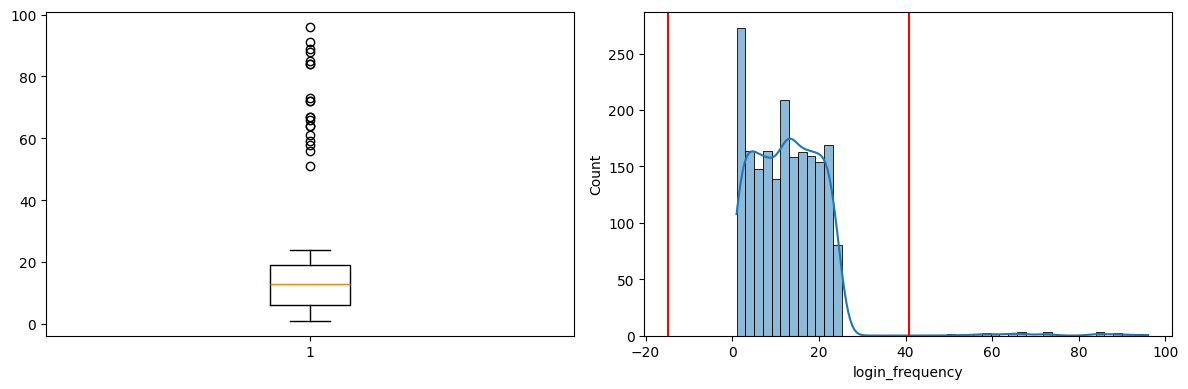

In [24]:
checkoutliers(data, "login_frequency")

In [25]:
handeloutliers(data ,"login_frequency")

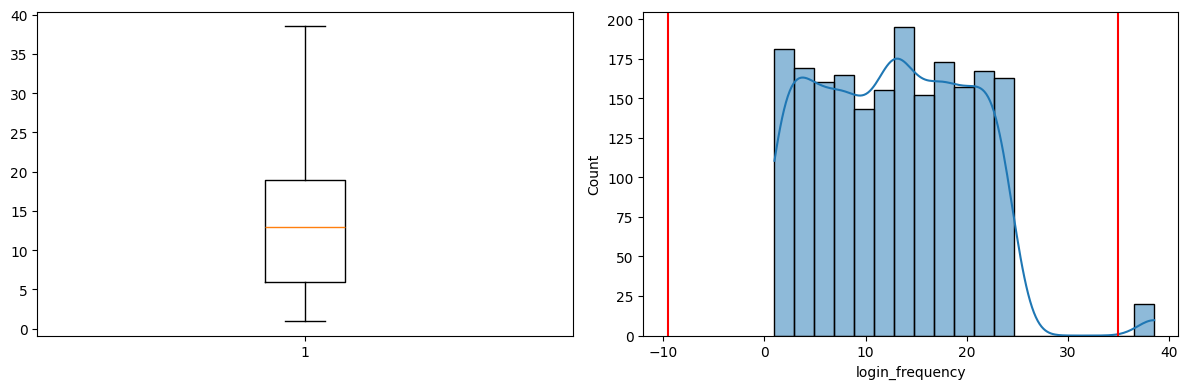

In [26]:
checkoutliers(data, "login_frequency")

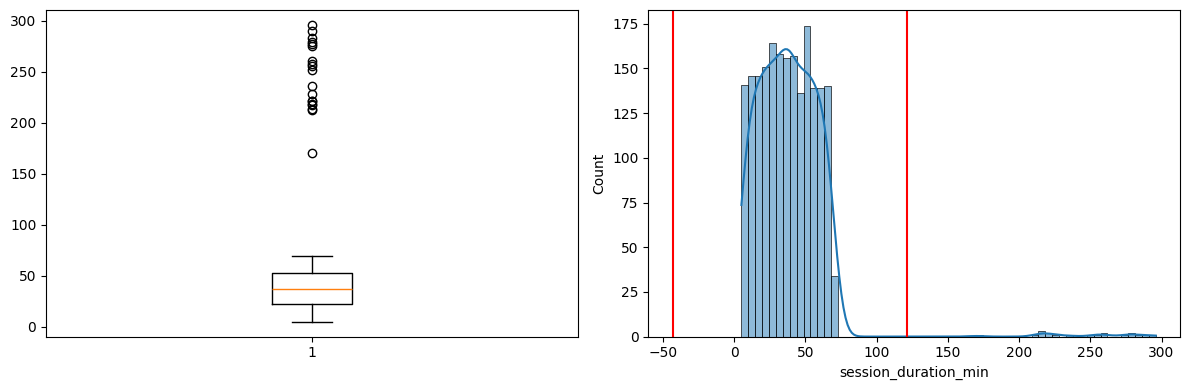

In [27]:
checkoutliers(data, "session_duration_min")

In [28]:
handeloutliers(data ,"session_duration_min")

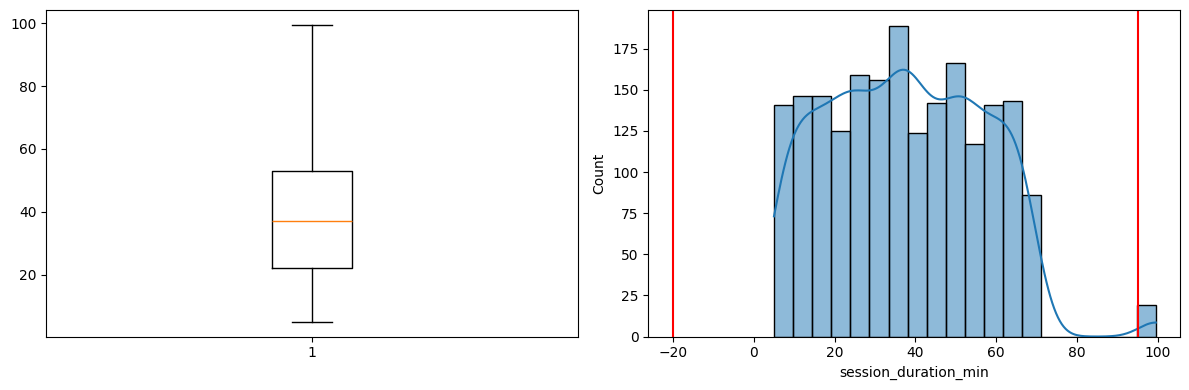

In [29]:
checkoutliers(data, "session_duration_min")

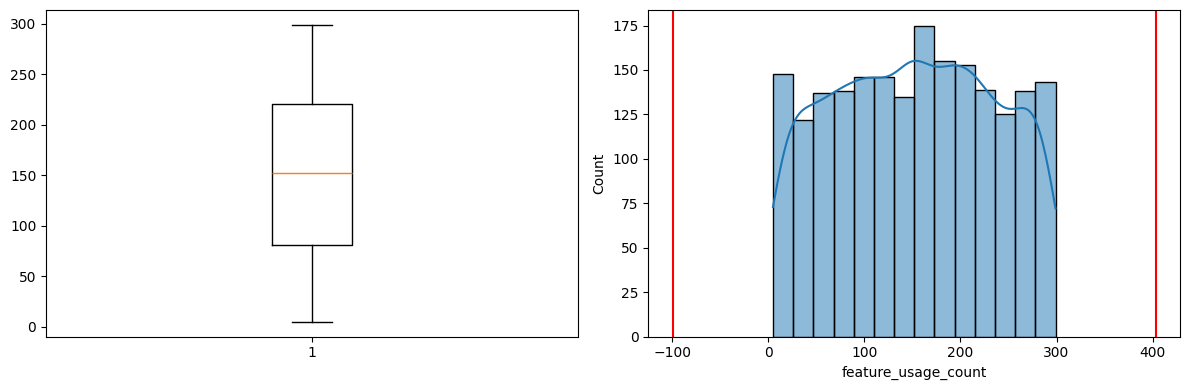

In [30]:
checkoutliers(data, "feature_usage_count")

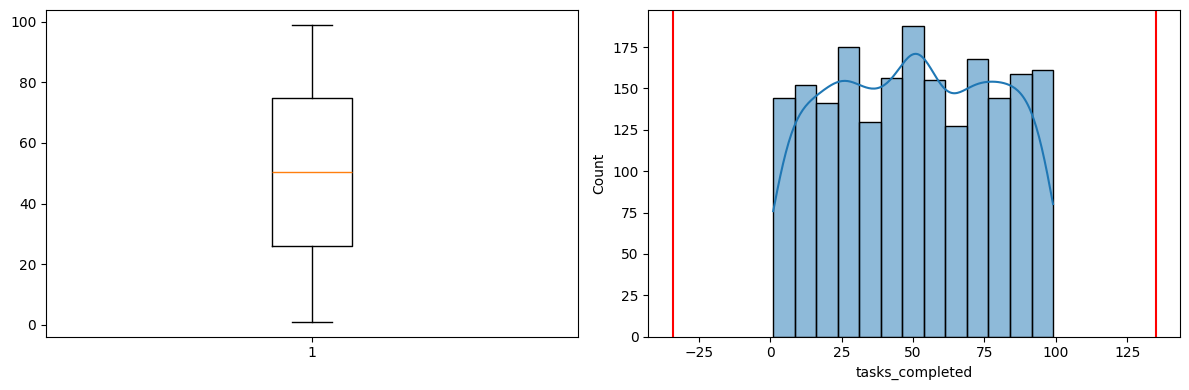

In [31]:
checkoutliers(data, "tasks_completed")

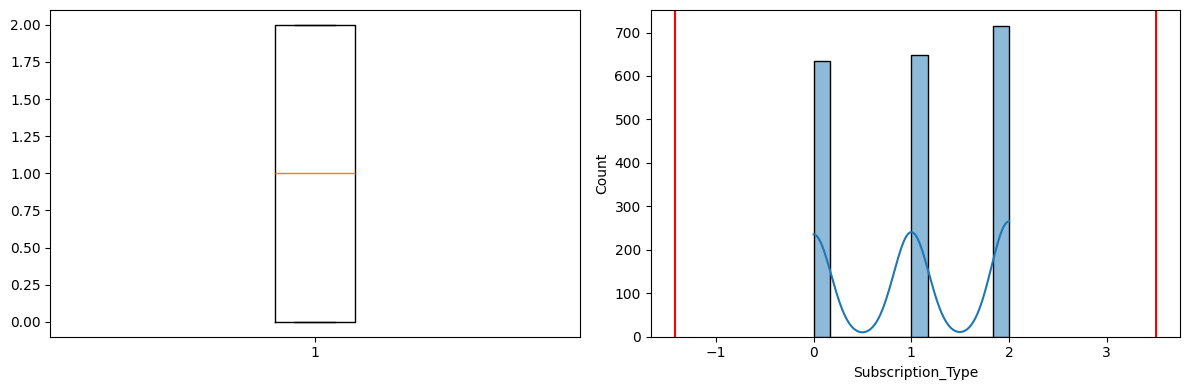

In [32]:
checkoutliers(data, "Subscription_Type")

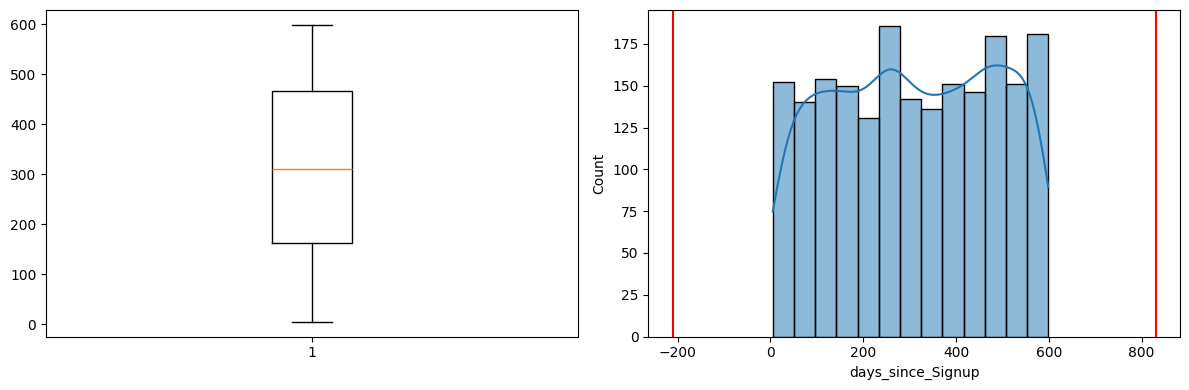

In [33]:
checkoutliers(data, "days_since_Signup")

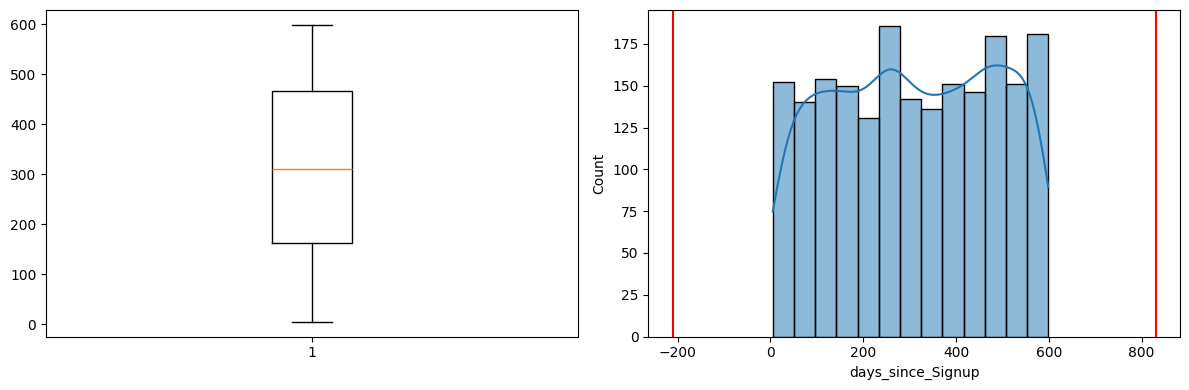

In [34]:
checkoutliers(data, "days_since_Signup")

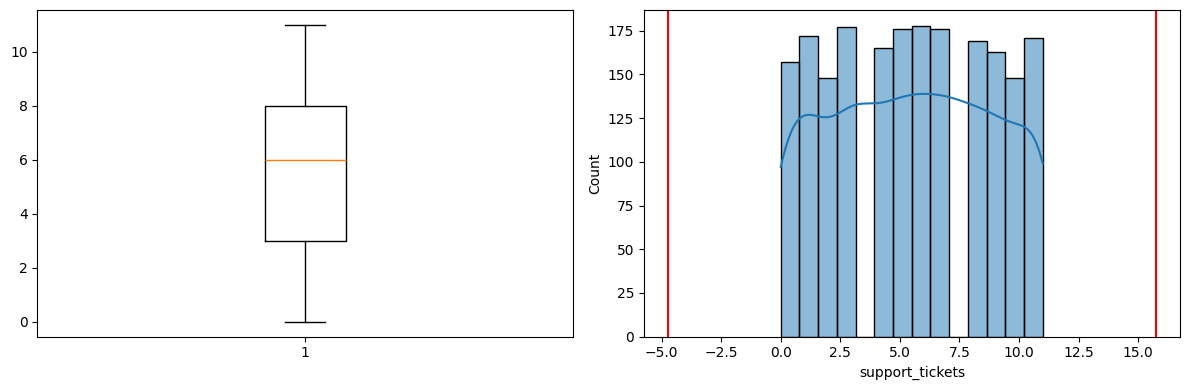

In [35]:
checkoutliers(data, "support_tickets")

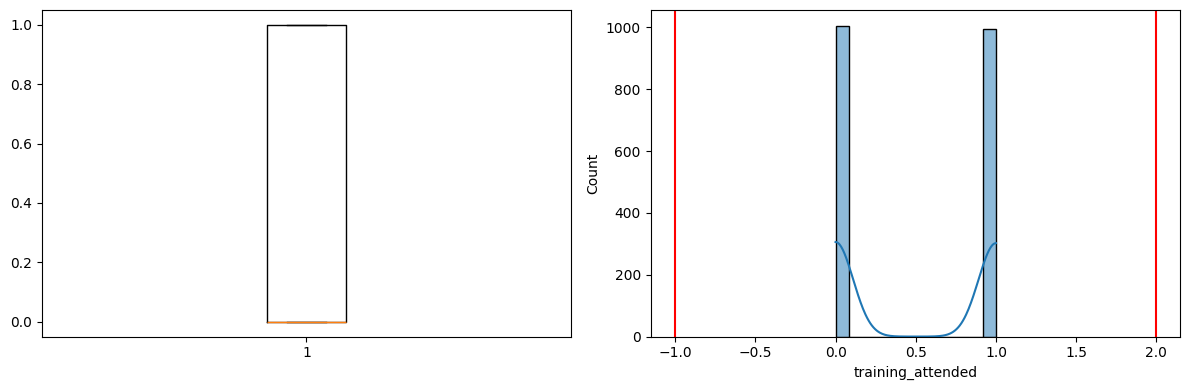

In [36]:
checkoutliers(data, "training_attended")

In [37]:
data.head(10)

,UserID,login_frequency,session_duration_min,feature_usage_count,tasks_completed,Subscription_Type,days_since_Signup,support_tickets,training_attended,adoption_level
0,U00001,7.0,30.0,225.0,11.0,0,546,9,0,2
1,U00002,20.0,12.0,127.0,53.0,1,589,7,0,1
2,U00003,15.0,46.0,238.0,10.0,2,266,11,1,1
3,U00004,11.0,48.0,225.0,85.0,0,93,7,0,1
4,U00005,8.0,18.0,7.0,84.0,2,212,9,0,2
5,U00006,21.0,6.0,186.0,8.0,1,217,11,0,1
6,U00007,7.0,41.0,210.0,36.0,2,270,10,0,2
7,U00008,19.0,42.0,44.0,93.0,0,297,2,1,2
8,U00009,23.0,45.0,63.0,76.0,0,211,10,1,2
9,U00010,11.0,66.0,66.0,14.0,0,337,1,1,2


## Checking the statastical information of the data

In [38]:
data.describe() # scaling doe not affect the random forest 

,login_frequency,session_duration_min,feature_usage_count,tasks_completed,Subscription_Type,days_since_Signup,support_tickets,training_attended,adoption_level
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,12.666000,37.520250,151.92800,50.376000,1.040500,309.886500,5.509500,0.497000,1.452500
std,7.407995,19.207646,83.80317,28.210061,0.821095,173.603156,3.408918,0.500116,0.627647
min,1.000000,5.000000,5.00000,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,6.000000,22.000000,80.75000,26.000000,0.000000,162.000000,3.000000,0.000000,1.000000
50%,13.000000,37.000000,152.00000,50.500000,1.000000,310.000000,6.000000,0.000000,2.000000
75%,19.000000,53.000000,221.00000,75.000000,2.000000,466.000000,8.000000,1.000000,2.000000
max,38.500000,99.500000,299.00000,99.000000,2.000000,599.000000,11.000000,1.000000,2.000000


## feature selection

In [39]:
data.drop("UserID", axis= 1)

,login_frequency,session_duration_min,feature_usage_count,tasks_completed,Subscription_Type,days_since_Signup,support_tickets,training_attended,adoption_level
0,7.0,30.0,225.0,11.0,0,546,9,0,2
1,20.0,12.0,127.0,53.0,1,589,7,0,1
2,15.0,46.0,238.0,10.0,2,266,11,1,1
3,11.0,48.0,225.0,85.0,0,93,7,0,1
4,8.0,18.0,7.0,84.0,2,212,9,0,2
...,...,...,...,...,...,...,...,...,...
1995,8.0,61.0,271.0,52.0,0,569,4,1,2
1996,21.0,37.0,144.0,31.0,0,110,7,1,1
1997,15.0,49.0,6.0,87.0,2,100,11,1,2
1998,1.0,49.0,12.0,68.0,2,555,11,0,2


# Checking the overall Correlation

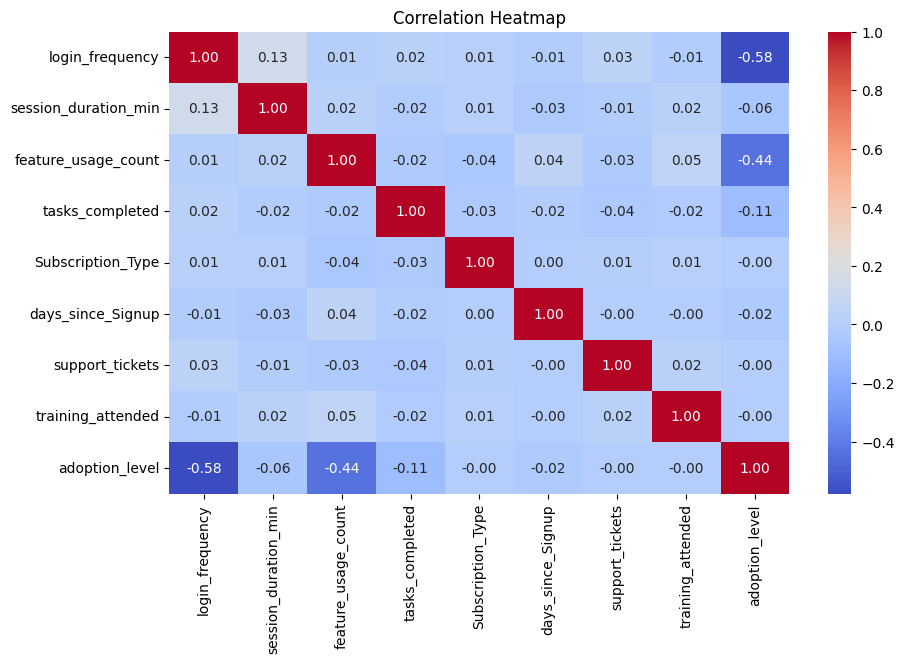

In [40]:
corr = data.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## checking the each feture correlation with the target variable 

In [41]:
target_corr = data.corr(numeric_only=True)["adoption_level"].sort_values(ascending=False)

target_corr


adoption_level          1.000000
training_attended      -0.001251
support_tickets        -0.001426
Subscription_Type      -0.003545
days_since_Signup      -0.024922
session_duration_min   -0.055721
tasks_completed        -0.113261
feature_usage_count    -0.439877
login_frequency        -0.577621
Name: adoption_level, dtype: float64

## checking the data is balnced or not  

In [42]:
data["adoption_level"].value_counts()

adoption_level
2    1051
1     803
0     146
Name: count, dtype: int64

## Creating the class of Randomforest 

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model = RandomForestClassifier()

## Spliting the data into input and output

In [44]:
X = data.drop(columns=["adoption_level", "UserID"], axis= 1)
Y = data["adoption_level"]

## Checking the 1 featire correlation with the group of features 

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculatVIF(data):
    vif = []
    output = pd.DataFrame()
    output['Attripute'] = data.columns
    for i in range(0, data.shape[1]):
        vif.append(variance_inflation_factor(data, i))
    output['VIF'] = vif
    return output
calculatVIF(X)    

,Attripute,VIF
0,login_frequency,3.665216
1,session_duration_min,4.201549
2,feature_usage_count,3.698088
3,tasks_completed,3.466769
4,Subscription_Type,2.401593
5,days_since_Signup,3.578121
6,support_tickets,3.163627
7,training_attended,1.925107


## Spliting the data into traing and testing 

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y ,test_size=0.3, random_state=43, stratify=Y)

## applying smote == (Making the data balanced)

In [47]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

print("Before SMOTE:")
print(Y_train.value_counts())

print("After SMOTE:")
print(Y_train_smote.value_counts())

Before SMOTE:
adoption_level
2    736
1    562
0    102
Name: count, dtype: int64
After SMOTE:
adoption_level
1    736
0    736
2    736
Name: count, dtype: int64


## Hyperparameter tunning for the best tree deciding 

In [48]:
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators": [100, 200, 300, 400, 500, 600]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid)
   

grid_search.fit(X_train_smote, Y_train_smote)

print("Best n_estimators:", grid_search.best_params_)


Best n_estimators: {'n_estimators': 400}


# applying the cross validation 

In [49]:
from sklearn.model_selection import cross_validate
model = RandomForestClassifier(n_estimators=400)
result = cross_validate(model, X_train_smote, Y_train_smote)

## training the model == (Passing smoted input and output too the model )

In [50]:
model.fit(X_train_smote, Y_train_smote)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",400
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

## Cheking the each fold accuracy of cross validation

In [51]:
print("cross validation score", result["test_score"])

cross validation score [0.98868778 0.97511312 0.9841629  0.98639456 0.97959184]


## Calculating the Average accuracy of cross validation

In [52]:
print("average accuracy of cross validation", result["test_score"].mean())

average accuracy of cross validation 0.9827900390925601


## Training and testing predictions

In [53]:
train_predict = model.predict(X_train_smote)

In [54]:
test_predict = model.predict(X_test)

## Calculating the testing accuracy 

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
test_pred = model.predict(X_test)
print("testing accuracy",accuracy_score(Y_test, test_predict))

testing accuracy 0.9666666666666667


## Training accuracy 

In [56]:
print("training accuracy", accuracy_score(Y_train_smote, train_predict))

training accuracy 1.0


## Confusion matric visually 

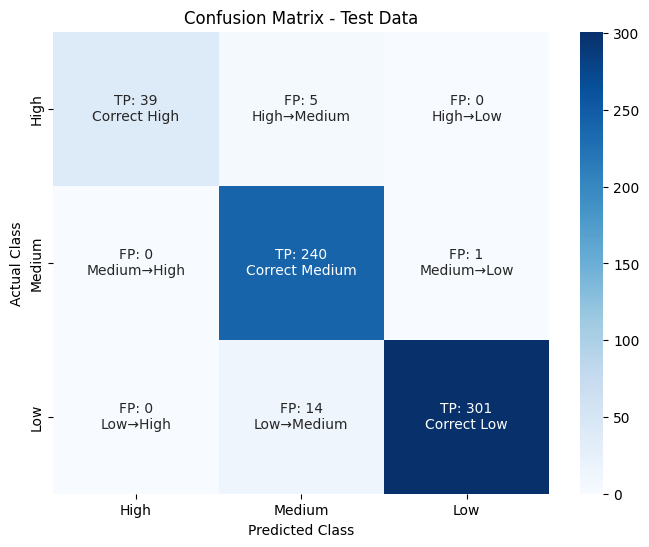

In [57]:
cm = [[39,5,0],[0,240,1],[0,14,301]]
classes = ["High", "Medium", "Low"]

annot_labels = [
    [f"TP: 39\nCorrect High", f"FP: 5\nHigh→Medium", f"FP: 0\nHigh→Low"],
    [f"FP: 0\nMedium→High", f"TP: 240\nCorrect Medium", f"FP: 1\nMedium→Low"],
    [f"FP: 0\nLow→High", f"FP: 14\nLow→Medium", f"TP: 301\nCorrect Low"]
]

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=annot_labels, fmt="", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix - Test Data")
plt.show()


## Summery of the model performance

In [58]:
print(classification_report(Y_test, test_pred, target_names=["High","Medium","Low"]))

              precision    recall  f1-score   support

        High       1.00      0.89      0.94        44
      Medium       0.93      1.00      0.96       241
         Low       1.00      0.96      0.98       315

    accuracy                           0.97       600
   macro avg       0.97      0.95      0.96       600
weighted avg       0.97      0.97      0.97       600



In [59]:
data.columns

Index(['UserID', 'login_frequency', 'session_duration_min',
       'feature_usage_count', 'tasks_completed', 'Subscription_Type',
       'days_since_Signup', 'support_tickets', 'training_attended',
       'adoption_level'],
      dtype='object')

## Passing the inpute to the model to predicting the Adoption level

In [65]:
new_data = pd.DataFrame({
    "login_frequency": [np.random.randint(10,21)],  
    "session_duration_min": [np.random.randint(22,52)],
    "feature_usage_count": [np.random.randint(114,245)],
    "tasks_completed": [np.random.randint(36,80)],
    "Subscription_Type": [np.random.choice([0,1,2])],
    "days_since_Signup": [np.random.randint(166,466)],
    "support_tickets": [np.random.randint(3,9)],
    "training_attended": [np.random.choice([0,1])]
})

In [66]:
# predicting the target 

In [67]:
predicted_class = model.predict(new_data)

label_map = {0: "High", 1: "Medium", 2: "Low"}
predicted_label = label_map[predicted_class[0]]

print("Predicted Adoption Level:", predicted_label)

Predicted Adoption Level: Medium


## Statastical info of after smoting the tarining data

In [64]:
X_train_smote.describe()

,login_frequency,session_duration_min,feature_usage_count,tasks_completed,Subscription_Type,days_since_Signup,support_tickets,training_attended
count,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000
mean,15.023360,37.265277,178.393297,57.387904,0.884964,312.530344,5.403533,0.396286
std,7.024781,18.636100,80.825890,26.664288,0.783490,173.286001,3.266827,0.489236
min,1.000000,5.000000,5.000000,1.000000,0.000000,5.000000,0.000000,0.000000
25%,10.000000,22.862462,114.159359,36.000000,0.000000,166.000000,3.000000,0.000000
50%,16.940787,37.000000,197.000000,61.934044,1.000000,321.500000,5.000000,0.000000
75%,20.176435,51.664320,244.000000,79.260086,2.000000,465.250000,8.000000,1.000000
max,38.500000,99.500000,299.000000,99.000000,2.000000,599.000000,11.000000,1.000000
